# Análise Exploratória de Dados (EDA)

Este notebook realiza uma Análise Exploratória de Dados (EDA) no dataset de aluguéis temporários em Nova York, obtidos no drive do desafio de ciência de dados. Os principais objetivos são:

1. Compreender a estrutura dos dados.
2. Identificar e tratar valores ausentes e inconsistências.
3. Explorar relações entre variáveis relevantes.
4. Gerar insights iniciais para a modelagem de preços.


#### Setup

Essa etapa importa as bibliotecas e carrega os dados que serão utilizados

In [155]:
# Importar as bibliotecas
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Carregar o dataset "sujo", original
file_path = os.path.join('..', 'data', 'dirty_dataset.csv')
df = pd.read_csv(file_path)

# Carregar o dataset "limpo", será modificado
file_path2 = os.path.join('..', 'data', 'clean_dataset.csv')
dataset = pd.read_csv(file_path2)

#### Visualizando o dataset

Essa etapa disponibiliza uma amostra dos dados do dataset

In [3]:
display(df)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Foi possível identificar que existem 48894 linhas e 16 colunas, bem como exemplos de preenchimentos destas

Dicionário dos Dados

- **id** - Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

- **nome** - Representa o nome do anúncio 

- **host_id** - Representa o id do usuário que hospedou o anúncio

- **host_name** - Contém o nome do usuário que hospedou o anúncio

- **bairro_group** - Contém o nome do bairro onde o anúncio está localizado

- **bairro** - Contém o nome da área onde o anúncio está localizado

- **latitude** - Contém a latitude do local

- **longitude** - Contém a longitude do local

- **room_type** - Contém o tipo de espaço de cada anúncio

- **price** - Contém o preço por noite em dólares listado pelo anfitrião

- **minimo_noites** - Contém o número mínimo de noites que o usuário deve reservar

- **numero_de_reviews** - Contém o número de comentários dados a cada listagem

- **ultima_review** - Contém a data da última revisão dada à listagem

- **reviews_por_mes** - Contém o número de avaliações fornecidas por mês

- **calculado_host_listings_count** - Contém a quantidade de listagem por host

- **disponibilidade_365** - Contém o número de dias em que o anúncio está disponível para reserva


#### Análise geral dos dados (detecção inicial geral de problemas)

Esta etapa permite identificar rapidamente problemas gerais e ter um panorama do dataset.

In [4]:
# Verificando colunas com valores nulos
nulos = df.isnull().sum()
nulos = nulos[nulos > 0]
print(nulos)

nome                  16
host_name             21
ultima_review      10052
reviews_por_mes    10052
dtype: int64


Algumas colunas do dataset possuem valores nulos, o que pode sugerir diferentes interpretações.
- **nome** (do anúncio) possui 16 nulos, o que sugere erro durante o cadastro ou anúncio sem título. Isso pode afetar análise dos anúncios baseadas nesse texto.
- **host_name** (nome do anfitrião) possui 21 nulos, o que pode significar perfis incompletos.
- **ultima_review** possui 10052 nulos, o que sugere que estes anúncios nunca receberam avaliações, mas também que eles podem ser novos. Isso pode impactar avaliação da popularidade dos imóveis.
- **reviews_por_mes** possui 10052 valores nulos, o que também sugere que os anúncios nunca receberam avaliações, ou são anúncios novos. O impacto, assim como a inferência são similares ao anterior. Os valores nulos iguais e a lógica deles, sugerem que os anúncios que tem esse campo vazio possuem os dois campos vazios, o que será analisado posteriormente.


In [5]:
# #Verificando quantas linhas por colunas possuem valores únicos
# df.nunique()

In [6]:
#Verificando tipos de dados por colunas
print("\nTipos de dados:\n", df.dtypes)


Tipos de dados:
 id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object


Os tipos de variáveis presentes em cada coluna correspondem ao esperado, com exceção da coluna **ultima_review**, que atualmente está no formato object. Para análises temporais mais eficazes, como analisar a temporalidade dos dados, será convertido para o formato datetime.

In [7]:
#Verificação de duplicatas: 
df.duplicated().sum()

0

Não há nenhuma linha duplicada, isso é bom pois evita enviesamento das análises

In [8]:
#Analise estatística preliminar das colunas int e float
colunas_int = df.select_dtypes(include=['int64', 'float64']).columns
df[colunas_int].describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Verificação de problemas por coluna (Análise Detalhada)

Analisando uma coluna por vez para identificar detalhes e possíveis problemas e inconsistências que serão tratadas na próxima sessão

##### Coluna: id

Conforme visualizado anteriormente, as informações para a coluna **id**:
- Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo.
- Não há valores nulos na coluna id.
- Não há valores negativos.
- Tem o tipo int64.

Restrições:
- não deve haver ids duplicados.

In [9]:
# Verifica se cada linha tem um id exclusivo
print(f"Há {df['id'].nunique()} valores de ids únicos para {len(df)} linhas")

Há 48894 valores de ids únicos para 48894 linhas


Assim é possível sugerir a integridade referencial do dataset, além da normalidade dos dados

##### Coluna: nome

Conforme visualizado anteriormente, as informações para a coluna **nome**:
- Representa o nome do anúncio.
- há 16 valores nulos na coluna nome.
- tem o tipo object.

Procedimentos:
- Analisar valores nulos
- Analisar necessidade de remover espaçamento extra
- Analisar nomes duplicados

###### Analisando valores nulos

In [10]:
# Visualizando os anúncios com o nome nulo
df[df['nome'].isnull()].sample(n=16)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
28888,22275821,NaN,49662398,Kathleen,Brooklyn,Bushwick,40.69546,-73.92741,Entire home/apt,110,4,5,2018-08-13,0.27,1,0
2853,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
13400,10052289,NaN,49522403,Vanessa,Brooklyn,Brownsville,40.66409,-73.92314,Private room,50,3,3,2016-08-18,0.07,1,362
16070,12988898,NaN,71552588,Andrea,Bronx,Fordham,40.86032,-73.88493,Shared room,130,1,0,NaN,NaN,1,365
8840,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
6566,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
12823,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0
5774,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
6604,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
18046,14135050,NaN,85288337,Jeff,Brooklyn,Bedford-Stuyvesant,40.69421,-73.93234,Private room,70,3,0,NaN,NaN,1,0


Anúncios com nomes nulos prejudicam o alcance do anúncio e é contrintuitivo. Isso sugere alguns tipos de problemas:

- **Cadastros abandonados**: Anuncios sem reviews e nenhuma disponibilidade sugerem que o cadastro não foi concluído com sucesso e o anúncio não cumpre seu papel.
- **Anúncios mal configurados**: Anúncios sem reviews e alguma disponibilidade sugerem que o cadastro foi feito incorretamente, o nome nulo foi um engano.
- **Anúncios abandonados**: Anúncios que possuem algum review indicam que já foram utilizados e sugerem que o nome foi alterado por desistência do host.

Solução:
- Para os cenários 1 e 2, a ausência do nome não é aleatória, mas sim um indicador de problema, que podem prejudicar a análise dos dados. Portanto, essas linhas serão excluídas.
- Para o cenário 3, mesmo sem nome, os preços e localização podem conter informações válidas sobre o mercado. Portanto será considerado para o modelo de previsão de preços. No caso da análise dos nomes no preço, esses anúncios serão desconsiderados.

In [11]:
# Atualizando o dataset limpo
# 1. Remove anúncios com nome nulo E reviews nulos
dataset = dataset[~((dataset['nome'].isna()) & (dataset['numero_de_reviews']== 0))]

# 2. Substitui nomes nulos por "nome nulo" onde há reviews
dataset.loc[(dataset['nome'].isna()) & (dataset['numero_de_reviews'].notna()), 'nome'] = 'nome nulo'

# Reseta o índice se necessário
dataset = dataset.reset_index(drop=True)

# Visualizando os anúncios com o nome nulo
print("Anúncios com nome nulo ", dataset[dataset['nome'].isnull()].shape[0])

Anúncios com nome nulo  0


In [104]:
#3. Atualizar o calculado_host_listing_count, para conferir valores reais
dataset.loc[dataset['host_id'].isin([69715276, 50448556]), 'calculado_host_listings_count'] = \
    dataset.loc[dataset['host_id'].isin([69715276, 50448556]), 'calculado_host_listings_count'] - 1

Todos os casos foram tratados. Para fins de documentação, foram excluídas 10 linhas considerados anúncios com nome nulo E reviews nulos.

###### Analisando espaços extras

In [12]:
# Quantidade de registros com espaço no início (ignorando nulos) do dataset sujo
espaco_inicio = df[df['nome'].notna()][df[df['nome'].notna()]['nome'].str.match('^\s+')].shape[0]
print(f'Registros com espaço no início: {espaco_inicio}')

# Quantidade de registros com espaço no fim (ignorando nulos) do dataset sujo
espaco_fim = df[df['nome'].notna()][df[df['nome'].notna()]['nome'].str.match('.*\s+$')].shape[0]
print(f'Registros com espaço no fim: {espaco_fim}')

# Quantidade de registros com mais de um espaço entre palavras (ignorando nulos) do dataset sujo
espaco_multiplo = df[df['nome'].notna()][df[df['nome'].notna()]['nome'].str.contains('\s{2,}')].shape[0]
print(f'Registros com espaços múltiplos: {espaco_multiplo}')

Registros com espaço no início: 13
Registros com espaço no fim: 231
Registros com espaços múltiplos: 1435


A presença de espaços anormais no início, no fim, ou múltiplos entre palavras prejudicam a qualidade dos dados de texto, prejudicando, por exemplo, a comparação de strings da próxima etapa. Por isso serão removidos.

In [13]:
# Atualizando o dataset limpo
# 1. Remove espaços do início e fim    
dataset['nome'] = (dataset['nome']               
    .str.strip()  
                   
# 2. Substitui múltiplos espaços no meio por um único espaço
    .str.replace(r'\s+', ' ', regex=True)  
)

In [14]:
# Quantidade de registros com espaço no início
espaco_inicio = dataset[dataset['nome'].str.match('^\s+')].shape[0]
print(f'Registros com espaço no início: {espaco_inicio}')

# Quantidade de registros com espaço no fim
espaco_fim = dataset[dataset['nome'].str.match('.*\s+$')].shape[0]
print(f'Registros com espaço no fim: {espaco_fim}')

# Quantidade de registros com mais de um espaço entre palavras
espaco_multiplo = dataset[dataset['nome'].str.contains('\s{2,}')].shape[0]
print(f'Registros com espaços múltiplos: {espaco_multiplo}')


Registros com espaço no início: 0
Registros com espaço no fim: 0
Registros com espaços múltiplos: 0


Os espaçamentos anormais foram removidos, em relação ao dataset "sujo" (df) e salvos no dataset "limpo" (dataset).

###### Analisando nomes duplicados

Os dadaos utilizados nessa sessão para comparar strings serão os dados já tratados na sessão anterior

In [15]:
# Calcular a quantidade de nomes duplicados
duplicados = dataset['nome'].value_counts()[dataset['nome'].value_counts() > 1]
print(f"Existem {len(duplicados)} nomes que aparecem mais de uma vez")

Existem 667 nomes que aparecem mais de uma vez


In [16]:
# Mostrar quais nomes se repetem e quantas vezes
print("Detalhamento:\n")
print(duplicados)

Detalhamento:

Hillside Hotel                      18
Home away from home                 17
New york Multi-unit building        16
Brooklyn Apartment                  12
Loft Suite @ The Box House Hotel    11
                                    ..
Brooklyn Heights Oasis               2
Prime East Village 1 Bedroom         2
Greenpoint Apartment                 2
Bensonhurst                          2
Sweet Home                           2
Name: nome, Length: 667, dtype: int64


Alguns anúncios possuem o mesmo nome, o que pode indicar uma variedade de cenários:
- Redes de hoteis, como "Hillside Hotel", por exemplo, podem cadastrar anúncios com o mesmo nome. A constatação pode ser analisada por serem anúncios do mesmo anfitrião (host). Nesse caso, esses imóveis que compartilham o mesmo anfitrião podem ter uma infraestrutura profissional, por exemplo, que influenciaria na popularidade deles.
- Nomes genéricos, como "Brooklyn Apartment", que podem ser atribuídos por várias pessoas sem relação
- 'nome nulo', anúncios cujos nomes eram nulos e foram alterados para essa string na limpeza de dados da sessão anterior.

In [17]:
# Visualizando amostras de uma rede de hotéis Hillside Hotel
dataset[dataset['nome'] == 'Hillside Hotel'].sample(n=5)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
26880,21312075,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70333,-73.81380,Private room,135,1,0,NaN,NaN,18,365
26891,21312732,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70455,-73.81528,Private room,135,1,0,NaN,NaN,18,309
26723,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26885,21312403,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70423,-73.81440,Private room,165,1,0,NaN,NaN,18,362
24141,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90


Com esses dados é possível identificar que:
- Hillside Hotel é um hotel estabelecido que gerencia vários quartos na plataforma
- Todos os imóveis são administrados pelo mesmo proprietário (mesmo host_ID)
- Estão localizados na mesma região (Queens)
- Alta disponibilidade para reservas no ano

In [18]:
# Visualizando amostras de nomes genéricos Brooklyn Apartment
dataset[dataset['nome'] == 'Brooklyn Apartment'].sample(n=5)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
17836,13991526,Brooklyn Apartment,14512391,Thomas,Brooklyn,Greenpoint,40.72050,-73.94125,Entire home/apt,100,1,1,2018-01-01,0.05,1,0
35228,27951475,Brooklyn Apartment,168569105,Maka,Brooklyn,Bedford-Stuyvesant,40.69037,-73.92694,Private room,60,9,1,2019-04-09,0.33,1,83
33912,26868493,Brooklyn Apartment,202074215,Michael,Brooklyn,Bedford-Stuyvesant,40.68563,-73.91988,Entire home/apt,89,2,52,2019-07-05,4.38,2,18
19438,15513127,Brooklyn Apartment,62644193,Elle,Brooklyn,East Flatbush,40.64335,-73.92981,Private room,70,1,0,NaN,NaN,1,157
21738,17481484,Brooklyn Apartment,118430352,Austin,Brooklyn,Crown Heights,40.67519,-73.94020,Private room,75,1,0,NaN,NaN,1,0


Com esses dados é possível identificar que:
- Brooklin Apartment é um exemplo claro de nome genérico sendo usado por diferentes proprietários
- Os imóveis são administrados por anfitriões diferentes e independentes (diferentes host_ID)
- Localizados em bairros diferentes do Brooklyn
- Mistura de apartamentos inteiros e quartos privados

In [19]:
# Visualizando os anúncios com nome nulo
dataset[dataset['nome'] == 'nome nulo']

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
3701,2232600,nome nulo,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5773,4209595,nome nulo,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5973,4370230,nome nulo,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
11957,9325951,nome nulo,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
13393,10052289,nome nulo,49522403,Vanessa,Brooklyn,Brownsville,40.66409,-73.92314,Private room,50,3,3,2016-08-18,0.07,1,362
28878,22275821,nome nulo,49662398,Kathleen,Brooklyn,Bushwick,40.69546,-73.92741,Entire home/apt,110,4,5,2018-08-13,0.27,1,0


Não há nada de especial, apenas foram reúnidos com o mesmo nome que não é um espaço nulo. posteriormente será utilizado

##### Coluna: host_id

Conforme visualizado anteriormente, as informações para a coluna host_id:
- Representa o id do usuário que hospedou o anúncio.
- Não há valores nulos.
- Não há valores negativos.
- tem o tipo int64.
    
Procedimentos:
- Calcular hosts diferentes e quantas vezes aparecem

###### Calculando host_id

In [77]:
# Calcular a quantidade de host_id diferentes
diferentes = dataset['host_id'].value_counts()[dataset['host_id'].value_counts() >= 1]
print(f"Existem {len(diferentes)} host_id que aparecem pelo menos uma vez")

Existem 37449 host_id que aparecem pelo menos uma vez


In [78]:
print(f"Média de anúncios por anfitrião: {len(df)/len(diferentes)}")

Média de anúncios por anfitrião: 1.3056156372666827


In [79]:
# Mostrar quais host_id diferentes existem e quantas vezes se repetem
print("Detalhamento:\n", diferentes)

Detalhamento:
 219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
69548489       1
18111963       1
69545387       1
48154615       1
68119814       1
Name: host_id, Length: 37449, dtype: int64


O dataset revela que 37449 anfitriões têm pelo menos um anúncio. Enquanto alguns gerenciam centenas de imóveis, a maioria aluga apenas um ou poucos, evidenciado pela média 1,31. Essa dinâmica sugere duas classes principais de negócios: aluguéis de proprietários individuais alugando suas próprias residências e operações profissionais de hospedagem. 

##### Coluna: host_name

Conforme visualizado anteriormente, as informações para a coluna host_name:
- Contém o nome do usuário que hospedou o anúncio
- Há 21 valores nulos.
- tem o tipo object.
    
Procedimentos:
- Analisar necessidade de remover espaçamentos extra,
- Tratar os valores nulos.
- Analisar consistência da correspondência de um host_name para um host_id, para anúncios do mesmo host,

###### Analisando espaços

In [21]:
# Análise dos espaços no início, sim e meio
analise_espacos = {
    'Espaços no início': df['host_name'].str.match('^\s+').sum(),
    'Espaços no fim': df['host_name'].str.match('.*\s+$').sum(),
    'Múltiplos espaços': df['host_name'].str.contains(r'\s{2,}').sum()
}
# Exibindo resultados
pd.Series(analise_espacos)

Espaços no início     0
Espaços no fim        0
Múltiplos espaços    41
dtype: int64

A presença de espaços anormais múltiplos entre palavras prejudicam a qualidade dos dados de texto, prejudicando, por exemplo, a comparação de strings da próxima etapa. Por isso serão removidos.

In [22]:
# Atualizando o dataset limpo 
dataset['host_name'] = (dataset['host_name']               
# 1. Substitui múltiplos espaços no meio por um único espaço
    .str.replace(r'\s+', ' ', regex=True)  
)

In [23]:
# Análise dos espaços no meio
analise_espacos = {
    'Múltiplos espaços': dataset['host_name'].str.contains(r'\s{2,}').sum()
}
# Exibindo resultados
pd.Series(analise_espacos)

Múltiplos espaços    0
dtype: int64

Os espaçamentos anormais foram removidos, em relação ao dataset "sujo" (df) e salvos no dataset "limpo" (dataset).

###### Tratando valores nulos

In [24]:
# Contar valores nulos em host_name
df['host_name'].isnull().sum()

21

In [25]:
# Substitui os espaços nulos por 'nome nulo'
dataset['host_name'] = dataset['host_name'].fillna('nome nulo')

In [26]:
# Contar valores nulos em host_name
dataset['host_name'].isnull().sum()

0

###### Analisando consistência

In [27]:
# Identificando host_ids com diferentes host_names

# Identficar anúncios com host_ids duplicados
anuncios_duplicados = dataset[dataset['host_id'].duplicated(keep=False)]

# Identificar nomes diferentes para o mesmo id_host
nomes_diferentes = anuncios_duplicados.groupby('host_id')['host_name'].nunique() > 1

# Exibir resultados
if nomes_diferentes.any():
   print(nomes_diferentes[nomes_diferentes])

Foi identificado a existência de apenas um host_name para cada host_id no dataset. Por tanto, está consistente.

##### Coluna: bairro_group

Conforme visualizado anteriormente, as informações para a coluna bairro_group:
- Contém o nome do bairro onde o anúncio está localizado
- Não há bairro_group nulo
- Tem o tipo object.
    
Procedimentos:
- Analisar necessidade de remover espaçamentos extra
- Analisar grafia correta de diferentes bairro_group

###### Analisando espaçamentos extra

In [28]:
# Quantidade de registros com espaço no início
espaco_inicio = df[df['bairro_group'].str.match('^\s+')].shape[0]
print(f'Registros com espaço no início: {espaco_inicio}')

# Quantidade de registros com espaço no fim
espaco_fim = df[df['bairro_group'].str.match('.*\s+$')].shape[0]
print(f'Registros com espaço no fim: {espaco_fim}')

# Quantidade de registros com mais de um espaço entre palavras
espaco_multiplo = df[df['bairro_group'].str.contains('\s{2,}')].shape[0]
print(f'Registros com espaços múltiplos: {espaco_multiplo}')

Registros com espaço no início: 0
Registros com espaço no fim: 0
Registros com espaços múltiplos: 0


Aparentemente não há necessidade de limpeza

###### Analisando grafia dos nomes

In [29]:
# Calcular a quantidade de bairro_group duplicados
disponiveis = df['bairro_group'].value_counts()[df['bairro_group'].value_counts() >= 1]
print(f"Existem {len(disponiveis)} bairro_group que aparecem pelo menos uma vez")

Existem 5 bairro_group que aparecem pelo menos uma vez


In [30]:
# Mostrar quais bairro_group se repetem e quantas vezes
print("Detalhamento:\n",disponiveis)

Detalhamento:
 Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: bairro_group, dtype: int64


Esses dados sugerem que a grafia dos grupos de bairro_group estão corretas

##### Coluna: bairro

Conforme visualizado anteriormente, as informações para a coluna bairro:
- Contém o nome do bairro onde o anúncio está localizado
- Não há bairro nulo
- Tem o tipo object.
    
Procedimentos:
- Analisar necessidade de remover espaçamentos extra
- Analisar grafia correta de diferentes bairro_group

###### Analisando espaçamentos extra

In [31]:
# Quantidade de registros com espaço no início
espaco_inicio = df[df['bairro'].str.match('^\s+')].shape[0]
print(f'Registros com espaço no início: {espaco_inicio}')

# Quantidade de registros com espaço no fim
espaco_fim = df[df['bairro'].str.match('.*\s+$')].shape[0]
print(f'Registros com espaço no fim: {espaco_fim}')

# Quantidade de registros com mais de um espaço entre palavras
espaco_multiplo = df[df['bairro'].str.contains('\s{2,}')].shape[0]
print(f'Registros com espaços múltiplos: {espaco_multiplo}')

Registros com espaço no início: 0
Registros com espaço no fim: 0
Registros com espaços múltiplos: 0


Aparentemente não há necessidade de limpeza

###### Analisando grafia dos nomes

In [32]:
# Calcular a quantidade de bairros disponíveis
disponiveis = df['bairro'].value_counts()[df['bairro'].value_counts() >= 1].sort_index()
print(f"Existem {len(disponiveis)} bairros que aparecem pelo menos uma vez")

Existem 221 bairros que aparecem pelo menos uma vez


In [33]:
# Mostrar quais bairros disponiveis e quantas vezes aparecem
print("Detalhamento:\n",disponiveis)

Detalhamento:
 Allerton            42
Arden Heights        4
Arrochar            21
Arverne             77
Astoria            900
                  ... 
Windsor Terrace    157
Woodhaven           88
Woodlawn            11
Woodrow              1
Woodside           235
Name: bairro, Length: 221, dtype: int64


Esses dados, organizados em ordem alfbética, permitiram uma análise comparativa entre bairros com muitas e poucas ocorrências no dataset. Bairros de muitas ocorrências sugerem que a grafia está correta pois foi escolhida várias vezes para o anúncio. A análise manual do texto de amostras com grafia próxima (ordem alfabética), mas com ocorrências variadas, sugere que a grafia dos bairros estão corretas, o que sugere que as diferenças observadas refletem bairros distintos e não erros de digitação.

##### Colunas: Latitude e Longitude

Conforme visualizado anteriormente, as informações para as colunas latitude e longitude:
- Contêm a latitude e a longitude do local.
- Não há valores nulos.
- Têm o tipo float64.
- O desafio indica que as coordenadas pertencem à cidade de NovaYork
    
Não aparentam nenhum problema

##### Coluna: room_type

Conforme visualizado anteriormente, as informações para a coluna room_tyoe:
- Contém o tipo de espaço de cada anúncio.
- Não há valores nulos.
- Tem o tipo object.

Procedimento:
- Verificar os tipos e se as grafias estão corretas

In [34]:
# Calcular a quantidade de room_type duplicados
disponiveis = df['room_type'].value_counts()[df['room_type'].value_counts() >= 1]
print(f"Existem {len(disponiveis)} tipos que aparecem pelo menos uma vez")

Existem 3 tipos que aparecem pelo menos uma vez


In [35]:
# Mostrar quais room_type se repetem e quantas vezes
print("Detalhamento:\n",disponiveis)

Detalhamento:
 Entire home/apt    25409
Private room       22325
Shared room         1160
Name: room_type, dtype: int64


Foi constatado a existência de três opções para room_type, de grafia corretas, portanto não será necessário a limpeza

##### Coluna: price

Conforme visualizado anteriormente, as informações para a coluna price:
- Não há valores nulos na coluna price.
- Não há valores negativos.
- Existe valores zero na coluna.
- Desvio padrão é 240 (alto)
- A média da coluna é 152.
- Tem o tipo int64.

Procedimentos:
- Analisar valores improváveis

###### Analisando valores improváveis

A análise inicial da coluna price sugere a presença de outliers, já que o desvio padrão (240) é alto em relação à média (152). Além disso, a existência de valores zero levanta dúvidas sobre a distribuição dos dados. Farei uma análise para investigar essas variações.

In [36]:
# Calcular a quantidade de price diferentes
diferentes = df['price'].value_counts()[df['price'].value_counts() >= 1].sort_index()
print(f"Existem {len(diferentes)} preços que aparecem pelo menos uma vez")

Existem 674 preços que aparecem pelo menos uma vez


In [37]:
# Mostrar quais price diferentes existem e quantas vezes se repetem
print("Detalhamento:\n", diferentes)


Detalhamento:
 0        11
10       17
11        3
12        4
13        1
         ..
7703      1
8000      1
8500      1
9999      3
10000     3
Name: price, Length: 674, dtype: int64


Os valores da coluna price estão distribuídos de forma irregular, com algumas variações extremas. Isso pode indicar a presença de outliers ou inconsistências nos dados. Durante a Análise Exploratória de Dados (AED), será investigado essa distribuição e aplicado os ajustes necessários.

##### Coluna: minimo_noites

Conforme visualizado anteriormente, as informações para a coluna minimo_noites:
- Não há valores nulos na coluna minimo_noites.
- Não há valores negativos.
- Tem o tipo int64.

Procedimentos:
- Analisar valores improváveis

###### Analisando valores improváveis

In [38]:
# Calcular a quantidade de minimo_noites diferentes
diferentes = df['minimo_noites'].value_counts()[df['minimo_noites'].value_counts() >= 1].sort_index()
print(f"Existem {len(diferentes)} minimo_noites que aparecem pelo menos uma vez")

Existem 109 minimo_noites que aparecem pelo menos uma vez


In [39]:
# Mostrar quais minimo_noites diferentes existem e quantas vezes se repetem
print("Detalhamento:\n", diferentes)

Detalhamento:
 1       12719
2       11696
3        7999
4        3303
5        3034
        ...  
480         1
500         5
999         3
1000        1
1250        1
Name: minimo_noites, Length: 109, dtype: int64


A distribuição de minimo_noites parece desbalanceada, com muitos valores baixos, mas também alguns números extremamente altos. Isso pode indicar outliers ou registros anormais, que serão analisados e tratados durante a AED.

##### Coluna: numero_de_reviews

Conforme visualizado anteriormente, as informações para a coluna numero_de_reviews:
- Não há valores nulos na coluna numero_de_reviews.
- Não há valores negativos.
- Tem o tipo int64.

Procedimentos:
- Analisar valores improváveis

###### Analisando valores improváveis

In [40]:
# Calcular a quantidade de numero_de_reviews diferentes
diferentes = df['numero_de_reviews'].value_counts()[df['numero_de_reviews'].value_counts() >= 1].sort_index()
print(f"Existem {len(diferentes)} numero_de_reviews que aparecem pelo menos uma vez")

Existem 394 numero_de_reviews que aparecem pelo menos uma vez


In [41]:
# Mostrar quais numero_de_reviews diferentes existem e quantas vezes se repetem
print("Detalhamento:\n", diferentes)

Detalhamento:
 0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
576        1
594        1
597        1
607        1
629        1
Name: numero_de_reviews, Length: 394, dtype: int64


A coluna numero_de_reviews indica quantas avaliações cada anúncio recebeu. Valores zero significam que o anúncio nunca foi avaliado, o que pode sugerir que ele é novo, pouco popular ou que não teve reservas. Já um número alto de avaliações pode indicar um anúncio que ficou muito tempo ativo e é popular. Durante a AED, essas informações serão cruzadas com outros fatores, como preço e tempo de publicação, para entender melhor o comportamento dos anúncios.

##### Coluna: ultima_review

Conforme visualizado anteriormente, as informações para a coluna ultima_review:
- Contém a data da última revisão dada à listagem
- Há 10042 valores nulos em ultima_review (10052 segundo a análise preliminar menos as 10 linhas excluídas de anúncios com nome nulo E reviews nulos ).
- Não há valores negativos.
- Tem o tipo object.

Procedimentos:
- Converter o tipo para datetime64
- Verificar consistência ((0 = reviews) = (ultima_review = null) = (reviews_por_mes = null)
- Analisar períodos mínimos e máximos

###### Convertendo o tipo para datetime64

In [59]:
# Converter ultima_review para datetime64
dataset['ultima_review'] = pd.to_datetime(dataset['ultima_review'], format='%Y-%m-%d')

In [60]:
# Verificar o tipo da coluna
print(dataset['ultima_review'].head())

0   2019-05-21
1          NaT
2   2019-07-05
3   2018-11-19
4   2019-06-22
Name: ultima_review, dtype: datetime64[ns]


O tipo dos dados da coluna foi convertido para o formato datetime64[D] para trabalhar apenas com datas (ano/mês/dia). O formato foi escolhido por ser padronizado internacionalmente, mantendo os valores nulos como NaT para permitir análises temporais confiáveis.

###### Analisando consistência

A existência de 10042 valores nulos em ultima_review e 10042 valores nulos em reviews_por_mes sugere que um anúncio com 0 reviews tem nulo ultimo_review e nulo reviews_por_mes. Essa hipótese será testada aqui.

In [61]:
# Verificar se registros com 0 reviews têm nulos em ultima_review e reviews_por_mes
print(dataset[dataset['numero_de_reviews'] == 0][['ultima_review', 'reviews_por_mes']].isnull().all(1).sum())

# Verificar total de registros com 0 reviews
print(dataset[dataset['numero_de_reviews'] == 0].shape[0])

10042
10042


A consistência dos dados é confirmada ao observarmos que o número de registros com zero reviews corresponde exatamente à quantidade de entradas onde tanto última_review quanto reviews_por_mes são nulos. Isso valida a hipótese e demonstra a integridade da base de dados.

###### Verificando as datas mínimas e máximas

In [62]:
# Verificar data mínima e máxima
print("Data mínima:", dataset['ultima_review'].min())
print("Data máxima:", dataset['ultima_review'].max())

Data mínima: 2011-03-28 00:00:00
Data máxima: 2019-07-08 00:00:00


O intervalo de tempo de última review que a base de dados é entre 2019/07/08 e 2011/03/28. Na AED será realizado a investigação do tempo que os dados abrangem, para uma visão mais apropriada dos dados.

In [63]:
# Calcular a quantidade de ultima_review diferentes
diferentes = dataset['ultima_review'].value_counts()[dataset['ultima_review'].value_counts() >= 1].sort_index()
print(f"Existem {len(diferentes)} ultima_review que aparecem pelo menos uma vez")

Existem 1764 ultima_review que aparecem pelo menos uma vez


In [64]:
# Mostrar quais ultima_review diferentes existem e quantas vezes se repetem
print("Detalhamento:\n", diferentes)

Detalhamento:
 2011-03-28      1
2011-04-25      1
2011-05-12      1
2011-09-18      1
2011-09-19      1
             ... 
2019-07-04    330
2019-07-05    580
2019-07-06    565
2019-07-07    718
2019-07-08     89
Name: ultima_review, Length: 1764, dtype: int64


In [ ]:
A concentração de datas mais perto da data máxima, sugerem que a data máxima foi o último dia que o dataset abrange.

##### Coluna: reviews_por_mes

In [ ]:
Conforme visualizado anteriormente, as informações para a coluna reviews_por_mes:
- Contém o número de avaliações fornecidas por mês
- Há 10042 valores nulos em ultima_review (10052 segundo a análise preliminar menos as 10 linhas excluídas de anúncios com nome nulo E reviews nulos ).
- Não há valores negativos.
- Tem o tipo float64.
- Consistência verificada na sessão anterior

Procedimentos:
- Análise preliminar

###### Analisando preliminarmente

O dado reviews_por_mês sugere a razão entre numero_de_reviews dividido pelo número de meses em que o anúncio está ativo. Isso permite inferir calcular lacunas de dados dos anúncios, como quando o anúncio foi criado. Cruzando isso com dados da ultima_review, é possível descobrir quanto tempo aquele anúncio foi relevante e estava ativo, por exemplo. Isso será explorado mais profundamente no AED. 

##### Coluna: calculado_host_listings_count

In [ ]:
Conforme visualizado anteriormente, as informações para a coluna calculado_host_listings_count:
- Contém a quantidade de listagem por host
- Não há valores negativos.
- Tem o tipo int.

Procedimentos:
- Analisar inconsistências

###### Analisando inconsistências

In [114]:
# Conferir se o número de anúncios por host é válido
tem_inconsistencia = (df.groupby('host_id')['calculado_host_listings_count'].nunique() > 1).any()
print(f"Existe host com mais de um calculado_host_listings_count diferente? {tem_inconsistencia}")

Existe host com mais de um calculado_host_listings_count diferente? False


In [ ]:
Em cada anúncio de um mesmo host só existe o mesmo número de calculado_host_listings_count, o que indica consistência do dado

In [124]:
# Conferir se o número de anúncios por host correspondem ao número de anuncios em dataset
soma_calculada = dataset[['host_id', 'calculado_host_listings_count']].drop_duplicates()['calculado_host_listings_count'].sum()
print(f"Soma total de calculado_host_listings_count em dataset (uma vez por host): {soma_calculada}")
print("Total de linhas de dataset",len(dataset))

Soma total de calculado_host_listings_count (uma vez por host): 48885
Total de linhas de dataset 48884


In [126]:
# Conferir se o número de anúncios por host correspondem ao número de anuncios em dataset
soma_calculada = df[['host_id', 'calculado_host_listings_count']].drop_duplicates()['calculado_host_listings_count'].sum()
print(f"Soma total de calculado_host_listings_count em df (uma vez por host): {soma_calculada}")
print("Total de linhas de df",len(df))

Soma total de calculado_host_listings_count (uma vez por host): 48895
Total de linhas de df 48894


Identifiquei a existência de uma inconsistência tanto no arquivo original quanto no dataset modificado. A soma dos números de calculado_host_listings_count de cada host excedem 

In [150]:
# Comparar para todos os host_id, se o valor de calculado_host_listings_count é a mesma quantidade de vezes que aparecem
host_checagem = df.groupby('host_id').agg({'calculado_host_listings_count': ['first', 'count']}).rename(columns={'first': 'declarado', 'count': 'real'})
incorretos = host_checagem[host_checagem['calculado_host_listings_count']['declarado'] != host_checagem['calculado_host_listings_count']['real']]
# Mostrar qual é o host_id inconsistente
print(incorretos)

        calculado_host_listings_count     
                            declarado real
host_id                                   
2787                                6    5


Foi encontrado o host_id com informação errada. Essa inconsistência provavelmente ocorreu porque um dos anúncios deste host foi removido da plataforma, mas o campo calculado_host_listings_count não foi atualizado antes da exportação dos dados. Abaixo o dado será atualizado.

In [151]:
dataset.loc[dataset['host_id'] == 2787, 'calculado_host_listings_count'] = 5

In [153]:
# Conferir se o número de anúncios por host correspondem ao número de anuncios em dataset
soma_calculada = dataset[['host_id', 'calculado_host_listings_count']].drop_duplicates()['calculado_host_listings_count'].sum()
print(f"Soma total de calculado_host_listings_count em dataset (uma vez por host): {soma_calculada}")

Soma total de calculado_host_listings_count em dataset (uma vez por host): 48884


In [ ]:
Agora sim o resultado é o esperado!

In [93]:
# Mostrar quais ultima_review diferentes existem e quantas vezes se repetem
print("Detalhamento:\n", diferentes)

Detalhamento:
 1      32295
2       6657
3       2853
4       1440
5        844
6        569
7        399
8        416
9        234
10       210
11       110
12       180
13       130
14        70
15        75
16        16
17        68
18        54
19        19
20        40
21        21
23        69
25        50
26        26
27        27
28        56
29        29
30        30
31        62
32        32
33        99
34        68
37        37
39        39
43        43
47        47
49        98
50        50
52       104
65        65
87        87
91        91
96       192
103      103
121      121
232      232
327      327
Name: calculado_host_listings_count, dtype: int64


In [98]:
dados = pd.Series({
    1: 32295, 2: 6657, 3: 2853, 4: 1440, 5: 844, 6: 569, 7: 399, 8: 416, 
    9: 234, 10: 210, 11: 110, 12: 180, 13: 130, 14: 70, 15: 75, 16: 16, 
    17: 68, 18: 54, 19: 19, 20: 40, 21: 21, 23: 69, 25: 50, 26: 26, 27: 27, 
    28: 56, 29: 29, 30: 30, 31: 62, 32: 32, 33: 99, 34: 68, 37: 37, 39: 39, 
    43: 43, 47: 47, 49: 98, 50: 50, 52: 104, 65: 65, 87: 87, 91: 91, 96: 192, 
    103: 103, 121: 121, 232: 232, 327: 327
})

soma = sum(index * value for index, value in dados.items())
print(f"Soma total: {soma}")

Soma total: 349284


##### Coluna: disponibilidade_365

In [ ]:
Conforme visualizado anteriormente, as informações para a coluna disponibilidade_365:
- Contém o número de dias em que o anúncio está disponível para reserva
- Não há valores negativos.
- Tem o tipo int64.
- Min e Max dentro do esperado (0 e 365)

Procedimentos:
- Análise preliminar

###### Analisando preliminarmente

A coluna tem valores esperados, não indicando nenhuma necessidade de correção. A existência de valores 0, sugerem que o anúncio não está ativo. A existência de reviews em linhas com disponibilidade_365 = 0 sugerem que o anúncio não está ativo mas já esteve. Essa abordagem será aprofundada na AED a seguir.

## Análise Exploratória de Dados (AED)

Essa sessão tem como objetivo compreender o comportamento das variáveis no dataset disponibilizado, identificar relações entre elas e levantar insights para orientar a modelagem preditiva de precificação dos imóveis.

### Definindo o período de atividade do dataset

Para compreender a dinâmica do mercado de aluguéis temporários, é essencial definir o período de atividade do dataset. Isso permite identificar padrões sazonais, avaliar a duração de anúncios ativos e fazer análises mais precisa de dados do mesmo período. Ao analisar a primeira e última interação dos anúncios, conseguimos estabelecer uma linha temporal confiável para cada anúncio.

In [167]:
# Mostrar a primeira e ultima ultima_review
print(dataset['ultima_review'].min())
print(dataset['ultima_review'].max())

2011-03-28 00:00:00
2019-07-08 00:00:00


A referência que tenho é a data da última review, sendo a ultima em 2019 e a primeira em 2011, mas sozinhos não refletem toda a abrangência dos dados. 

In [192]:
# Visualizar amostra para realizar calculos
amostra = dataset[dataset['ultima_review'].notna()].sample(n=2)
display(amostra)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
33453,26450823,Sonder | Hanover Square | Airy 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70506,-74.0079,Entire home/apt,185,29,1,2018-10-01,0.11,96,220
26074,20809263,Elegant Studio Apt in Prospect Heights,87024253,Miguel,Brooklyn,Prospect Heights,40.67935,-73.9723,Entire home/apt,115,2,7,2017-11-27,0.32,1,0


Analisando a primeia amostra, a ultima review foi em 2019/05/31. Dividindo reviews/mês pelo número de reviews, posso descobrir a quantos meses o anúncio está ativo. Assim, descobrindo a data aproximada do primeiro review e o período de uso do anúncio, que será chamado de meses_de_atividade.

In [197]:
# Criar coluna de meses de atividade
amostra['meses_de_atividade'] = amostra['numero_de_reviews']/amostra['reviews_por_mes']

# Calcular primeira review (com normalize para remover horas)
amostra['primeira_review'] = (amostra['ultima_review'] - pd.to_timedelta(amostra['meses_de_atividade'] * 30, unit='D'))

# Mostrar resultado na amostra
display(amostra[['reviews_por_mes', 'numero_de_reviews', 'meses_de_atividade', 'ultima_review', 'primeira_review']])

,reviews_por_mes,numero_de_reviews,meses_de_atividade,ultima_review,primeira_review
33453,0.11,1,9.090909,2018-10-01,2018-01-01
26074,0.32,7,21.875000,2017-11-27,2016-02-09


Agora criarei uma cópia do dataset e reproduzirei esse comportamento no dataset limpo

In [252]:
# Copiar dataset
dataset_periodo = dataset.copy()
# Variáveis auxiliares
ultima_review_max = dataset['ultima_review'].max()
meses_totais = dataset['numero_de_reviews'] / dataset['reviews_por_mes']

# Criar coluna meses_de_atividade (com tratamento para evitar divisao por zero)
dataset_periodo['meses_de_atividade'] = meses_totais - abs((ultima_review_max - dataset_periodo['ultima_review']).dt.days / 30)
# Criar coluna primeira_review (evitando operações com nulos)
# 1. Tratar NaN antes de calcular primeira_review
dataset_periodo['meses_de_atividade'] = dataset_periodo['meses_de_atividade'].fillna(0)
# 2. Criar coluna primeira_review
dataset_periodo['primeira_review'] = dataset_periodo.apply(
   lambda x: x['ultima_review'] - pd.Timedelta(days=float(x['meses_de_atividade'] * 30)), 
   axis=1
)
# Salvar dataset
dataset_periodo.to_csv('dataset_periodo.csv', index=False)

# Visualizar amostra do dataset
display(dataset_periodo[['ultima_review', 'reviews_por_mes', 'numero_de_reviews', 'meses_de_atividade', 'primeira_review']].head())

,ultima_review,reviews_por_mes,numero_de_reviews,meses_de_atividade,primeira_review
0,2019-05-21,0.38,45,116.821053,2009-10-15 08:50:31.578947392
1,NaT,NaN,0,0.000000,NaT
2,2019-07-05,4.64,270,58.089655,2014-09-26 07:26:53.793103456
3,2018-11-19,0.10,9,82.300000,2012-02-15 00:00:00.000000000
4,2019-06-22,0.59,74,124.890395,2009-03-19 06:54:54.915254208


Com essas operações é possível identificar o período de abrangência dos dados, entre outras coisas. Para fins de interpretação será considerado a primeira review e a ultima review como intervalo de atividade de cada anúncio

In [214]:
print(f"Primeira review mais antiga: {dataset_periodo['primeira_review'].min()}")
print(f"Última review mais recente: {dataset_periodo['ultima_review'].max()}")

Primeira review mais antiga: 2001-06-05 00:00:00
Última review mais recente: 2019-07-08 00:00:00


In [223]:
# Para 2001
primeiro_ano = dataset_periodo['primeira_review'].min()
dias_primeiro_ano = (pd.to_datetime(f'2001-12-31') - primeiro_ano).days
percentual_2001 = (dias_primeiro_ano / 365) * 100

# Para 2019
ultimo_ano = dataset_periodo['ultima_review'].max()
dias_ultimo_ano = (ultimo_ano - pd.to_datetime('2019-01-01')).days
percentual_2019 = (dias_ultimo_ano / 365) * 100

print(f"2001: {percentual_2001:.1f}% do ano ({dias_primeiro_ano} dias)")
print(f"2019: {percentual_2019:.1f}% do ano ({dias_ultimo_ano} dias)")

2001: 57.3% do ano (209 dias)
2019: 51.5% do ano (188 dias)


In [ ]:
Este é percentual de cobertura dos dados dos anos inicias e finais 

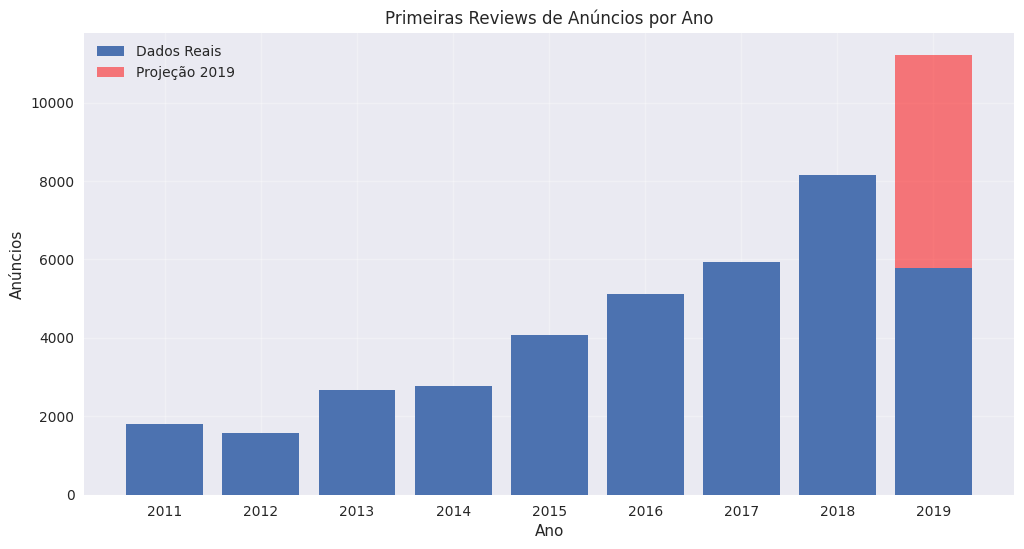

In [225]:
plt.figure(figsize=(12, 6))
anos = range(2011, 2020)
contagem = dataset_periodo['primeira_review'].dt.year.value_counts().reindex(anos).fillna(0)

plt.bar(anos, contagem, label='Dados Reais')
# Adiciona projeção para 2019 para ano completo
contagem_2019_projetada = contagem[2019] / 0.515
plt.bar(2019, contagem_2019_projetada - contagem[2019], bottom=contagem[2019], 
        alpha=0.5, color='red', label='Projeção 2019')

plt.title('Primeiras Reviews de Anúncios por Ano')
plt.xlabel('Ano')
plt.ylabel('Anúncios')
plt.xticks(anos)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [ ]:
Esse gráfico mostra uma tendência de aumento de inscrições de anúncios entre 2012 e 2019 (considerando que a cobertura de dados é apenas de 51.5% do ano)

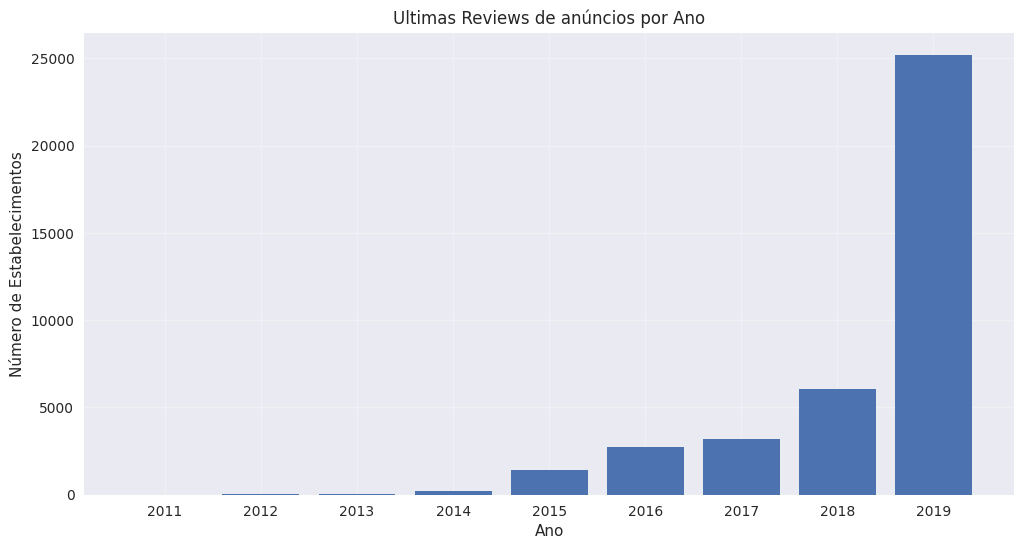

In [236]:
plt.figure(figsize=(12, 6))
anos = range(2011, 2020)
contagem = dataset_periodo['ultima_review'].dt.year.value_counts().reindex(anos).fillna(0)

plt.bar(anos, contagem)
plt.title('Ultimas Reviews de anúncios por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Estabelecimentos')
plt.xticks(anos)
plt.grid(True, alpha=0.3)
plt.show()

Essa visualização mostra uma grande concentração de ultimos anuncios em 2019. Com o aumento do número de novos anúncios é natural o aumento do número de anúncios cancelados, entretanto esse acúmulo se deve principalmente pelo fato de que é o ultimo ano que se tem registro.

In [ ]:
Analisando o novo dado de meses_de_atividade é possível constatar que:

In [232]:
dataset_periodo['meses_de_atividade'].describe()

count    38842.000000
mean        27.589514
std         22.334171
min          1.000000
25%          9.130000
50%         22.745000
75%         40.860000
max        128.570000
Name: meses_de_atividade, dtype: float64

A análise de meses_de_atividade mostra grande variação nos dados, com uma média de 27,59 meses e um desvio padrão de 22,33 meses, indicando dispersão significativa. A mediana de 22,75 meses sugere que metade dos registros tem menor tempo de atividade. Além disso, a presença de valores máximos altos (128,57 meses) pode indicar outliers, possivelmente refletindo usuários muito antigos na plataforma.

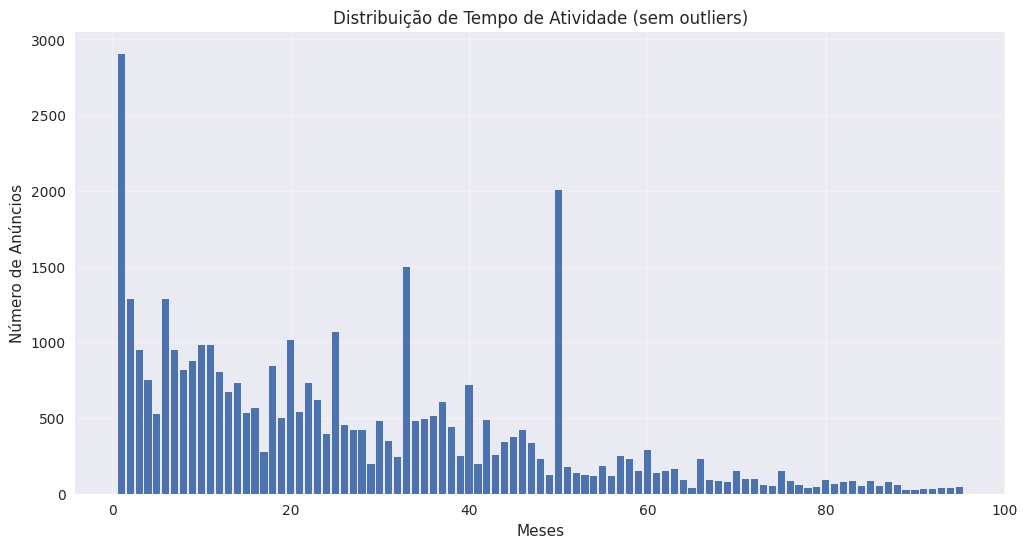

In [246]:
# Calcula percentis
p1 = dataset_periodo['meses_de_atividade'].quantile(0.01)
p99 = dataset_periodo['meses_de_atividade'].quantile(0.99)

# Filtra e plota
dados_filtrados = dataset_periodo[(dataset_periodo['meses_de_atividade'] >= p1) & 
                               (dataset_periodo['meses_de_atividade'] <= p99)]

plt.figure(figsize=(12, 6))
meses = dados_filtrados['meses_de_atividade'].fillna(0).astype(int).value_counts().sort_index()
plt.bar(meses.index, meses.values)
plt.title('Distribuição de Tempo de Atividade (sem outliers)')
plt.xlabel('Meses')
plt.ylabel('Número de Anúncios')
plt.grid(True, alpha=0.3)
plt.show()

In [248]:
# Filtrar registros com 50 meses
cinquenta_meses = dataset_periodo[dataset_periodo['meses_de_atividade'] == 50]

# Análise básica
print(f"Total de estabelecimentos com 50 meses: {len(cinquenta_meses)}")
# Visualizar todos os dados dos estabelecimentos com 50 meses
cinquenta_meses = dataset_periodo[dataset_periodo['meses_de_atividade'] == 50]
pd.set_option('display.max_rows', None)
print(cinquenta_meses[['primeira_review', 'ultima_review', 'numero_de_reviews', 'reviews_por_mes']])

Total de estabelecimentos com 50 meses: 1834
      primeira_review ultima_review  numero_de_reviews  reviews_por_mes
163        2012-08-15    2016-09-23                  4             0.08
165        2011-09-24    2015-11-02                  2             0.04
169        2015-05-11    2019-06-19                 47             0.94
374        2011-11-24    2016-01-02                  1             0.02
515        2011-11-23    2016-01-01                  1             0.02
519        2010-03-12    2014-04-20                  1             0.02
670        2011-05-17    2015-06-25                  2             0.04
766        2010-07-23    2014-08-31                  1             0.02
837        2010-02-13    2014-03-24                  1             0.02
899        2011-10-08    2015-11-16                  1             0.02
948        2010-07-27    2014-09-04                  1             0.02
953        2011-09-03    2015-10-12                  5             0.10
1061       2010-07-

### Identificando anúncios ativos e inativos

A existência de anúncios com disponibilidade_365 zerada ou preço zerado, mas com avaliações, como levantado anteriormente, sugerem que esses anúncios já estiveram ativos e não estão mais. Esse comportamento pode ser evidenciado pela análise da coluna 

In [163]:
print(df['reviews_por_mes'].describe())

count    38842.000000
mean         1.373251
std          1.680453
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_por_mes, dtype: float64


Através dos quartis 50% e 75% é possível identificar que:
- 50% dos anúncios recebem menos de 0,72 avaliações por mês.
- 75% dos anúncios recebem menos de 2,02 avaliações por mês.

Isso indica que a maioria dos anúncios tem poucas avaliações por mês, o que pode sugerir que a quantidade total de 

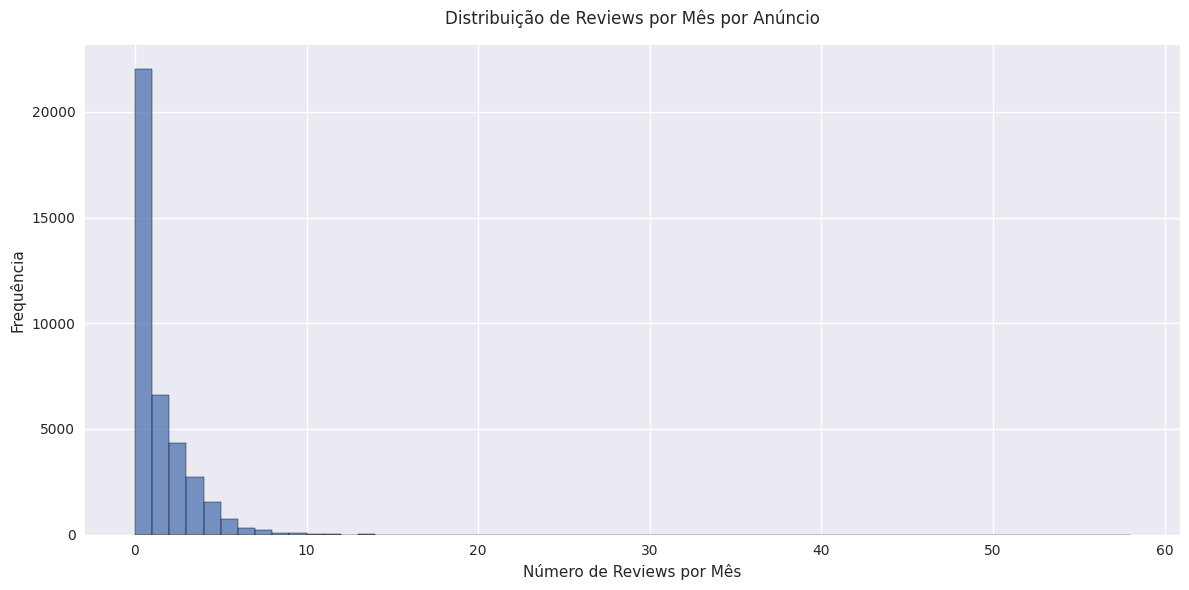

In [162]:
plt.figure(figsize=(12, 6))
bins = list(range(0, int(df['reviews_por_mes'].max()) + 1, 1))
sns.histplot(data=df, x='reviews_por_mes', bins=bins)
plt.title('Distribuição de Reviews por Mês por Anúncio', pad=15)
plt.xlabel('Número de Reviews por Mês')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [ ]:
Afim de permitir uma análise temporal 